### 同比环比
+ 同比是指相对于去年同一时期的比值 (2020-Q1 - 2019-Q1)/2019-Q1
+ 环比是指相对于前一阶段的比值(2020-Q1 - 2019-Q4)/2019-Q4

In [1]:
import pandas as pd
%matplotlib inline
fpath = "../datas/beijing_tianqi/beijing_tianqi_2017-2019.csv"
df = pd.read_csv(fpath, index_col="ymd", parse_dates=True)
df.head()

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2017-01-01,5℃,-3℃,霾~晴,南风,1-2级,450,严重污染,6
2017-01-02,7℃,-6℃,晴~霾,南风,1-2级,246,重度污染,5
2017-01-03,5℃,-5℃,霾,南风,1-2级,320,严重污染,6
2017-01-04,6℃,-5℃,霾,北风,1-2级,360,严重污染,6
2017-01-05,2℃,-4℃,霾,北风,1-2级,280,重度污染,5


In [2]:
df['bWendu'] = df['bWendu'].str.replace('℃','').astype('int32')
df.head()

,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,
2017-01-01,5,-3℃,霾~晴,南风,1-2级,450,严重污染,6
2017-01-02,7,-6℃,晴~霾,南风,1-2级,246,重度污染,5
2017-01-03,5,-5℃,霾,南风,1-2级,320,严重污染,6
2017-01-04,6,-5℃,霾,北风,1-2级,360,严重污染,6
2017-01-05,2,-4℃,霾,北风,1-2级,280,重度污染,5


In [5]:
df_sample = df[['bWendu', 'aqi']].resample('M').mean()
df_sample.head()

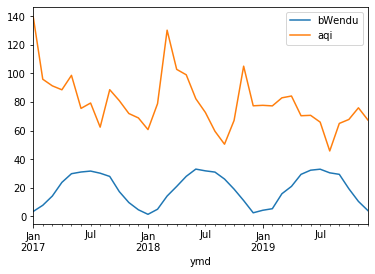

In [7]:
df_sample.plot()

In [8]:
df_sample.corr()

,bWendu,aqi
bWendu,1.00000,-0.25271
aqi,-0.25271,1.00000


In [13]:
df_sample['hb_w1'] = df_sample['bWendu'].pct_change(periods=1)
df_sample['tb_w1'] = df_sample['bWendu'].pct_change(periods=12)

In [16]:
df_sample.head(13)

,bWendu,aqi,hb_w1,tb_w1
ymd,,,,
2017-01-31,3.322581,139.806452,NaN,NaN
2017-02-28,7.642857,95.964286,1.300277,NaN
2017-03-31,14.129032,91.322581,0.848658,NaN
2017-04-30,23.700000,88.566667,0.677397,NaN
2017-05-31,29.774194,98.677419,0.256295,NaN
2017-06-30,30.966667,75.533333,0.040051,NaN
2017-07-31,31.612903,79.290323,0.020869,NaN
2017-08-31,30.129032,62.387097,-0.046939,NaN
2017-09-30,27.866667,88.633333,-0.075089,NaN


In [17]:
df_sample['hb_w2'] = df_sample['bWendu'].diff(periods=1) / df_sample['bWendu'].shift(periods=1)
df_sample['tb_w2'] = df_sample['bWendu'].diff(periods=12) / df_sample['bWendu'].shift(periods=12)

In [18]:
df_sample.head(13)

,bWendu,aqi,hb_w1,tb_w1,hb_w2,tb_w2
ymd,,,,,,
2017-01-31,3.322581,139.806452,NaN,NaN,NaN,NaN
2017-02-28,7.642857,95.964286,1.300277,NaN,1.300277,NaN
2017-03-31,14.129032,91.322581,0.848658,NaN,0.848658,NaN
2017-04-30,23.700000,88.566667,0.677397,NaN,0.677397,NaN
2017-05-31,29.774194,98.677419,0.256295,NaN,0.256295,NaN
2017-06-30,30.966667,75.533333,0.040051,NaN,0.040051,NaN
2017-07-31,31.612903,79.290323,0.020869,NaN,0.020869,NaN
2017-08-31,30.129032,62.387097,-0.046939,NaN,-0.046939,NaN
2017-09-30,27.866667,88.633333,-0.075089,NaN,-0.075089,NaN


In [19]:
df_sample.loc['2018':'2019']

,bWendu,aqi,hb_w1,tb_w1,hb_w2,tb_w2
ymd,,,,,,
2018-01-31,1.322581,60.677419,-0.705036,-0.601942,-0.705036,-0.601942
2018-02-28,4.892857,78.857143,2.699477,-0.359813,2.699477,-0.359813
2018-03-31,14.129032,130.322581,1.887685,0.000000,1.887685,0.000000
2018-04-30,20.866667,102.866667,0.476865,-0.119550,0.476865,-0.119550
2018-05-31,27.935484,99.064516,0.338761,-0.061755,0.338761,-0.061755
2018-06-30,33.000000,82.300000,0.181293,0.065662,0.181293,0.065662
2018-07-31,31.774194,72.677419,-0.037146,0.005102,-0.037146,0.005102
2018-08-31,30.903226,59.516129,-0.027411,0.025696,-0.027411,0.025696
2018-09-30,26.033333,50.433333,-0.157585,-0.065789,-0.157585,-0.065789


In [29]:
df_data = df_sample.loc['2018':'2019', ['hb_w1', 'tb_w1']]
df_data.head()

,hb_w1,tb_w1
ymd,,
2018-01-31,-0.705036,-0.601942
2018-02-28,2.699477,-0.359813
2018-03-31,1.887685,0.000000
2018-04-30,0.476865,-0.119550
2018-05-31,0.338761,-0.061755


In [30]:
df_data.rename(columns={'hb_w1':'huanbi', 'tb_w1':'tongbi'}, inplace=True)

In [31]:
df_data.head()

,huanbi,tongbi
ymd,,
2018-01-31,-0.705036,-0.601942
2018-02-28,2.699477,-0.359813
2018-03-31,1.887685,0.000000
2018-04-30,0.476865,-0.119550
2018-05-31,0.338761,-0.061755


In [33]:
df_data.index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='ymd', freq='M')

In [34]:
df_data.sort_index(ascending=True, inplace=True)
df_data.head()

,huanbi,tongbi
ymd,,
2018-01-31,-0.705036,-0.601942
2018-02-28,2.699477,-0.359813
2018-03-31,1.887685,0.000000
2018-04-30,0.476865,-0.119550
2018-05-31,0.338761,-0.061755


In [35]:
df_data.index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='ymd', freq='M')

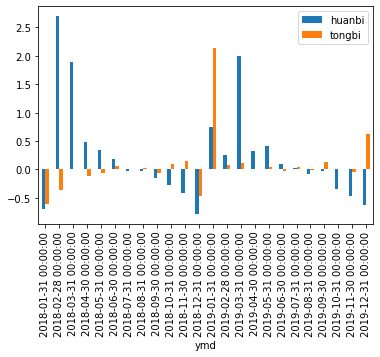

In [38]:
# df_data.plot()
ax = df_data.plot.bar()